## Task 1: Nhập và tải dữ liệu

In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
filename = input('Please key in the filename: ')
df = pd.read_csv(filename)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Task 2: Làm sạch và xử lý dữ liệu

### Task 2.1: Hợp nhất dữ liệu 12 tháng

In [26]:
path = './data/'

frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)

result.to_csv('annualSales2019.csv', index=False)

### Task 2.2: Thêm cột "Tháng"

In [27]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


Thiết lập lại cột tháng

In [28]:
print(set(df['Month']))

{'Or', '05', '03', '01', '06', '07', '10', '08', '11', nan, '09', '02', '12', '04'}


### Task 2.3: Loại bỏ giá trị 'NaN' và 'Or'

In [29]:
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## Task 3: Báo cáo

### Task 3.1: Tháng  bán hàng chạy nhất? Tháng đó kiếm được bao nhiêu?

In [30]:
print(df['Quantity Ordered'].dtype)
print(df['Price Each'].dtype)

object
object


In [31]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')


In [32]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


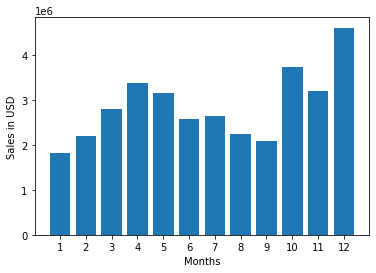

In [33]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.groupby('Month').sum()['Sales']
sales_value = df.groupby('Month').sum()['Sales']
months = range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.2: Thành phố nào có doanh số bán hàng tốt nhất?

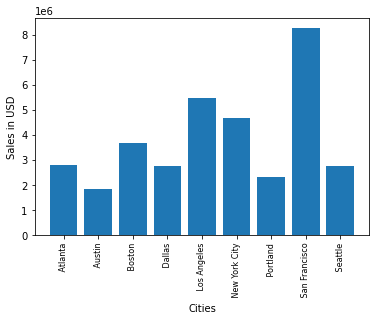

In [34]:
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
df.groupby('City').sum()['Sales']
sales_value_city = df.groupby('City').sum()['Sales']
cities = [city for city, sales in sales_value_city.items()]
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.3: Chúng ta nên hiển thị quảng cáo vào thời gian nào để tối đa hóa khả năng khách hàng mua sản phẩm?

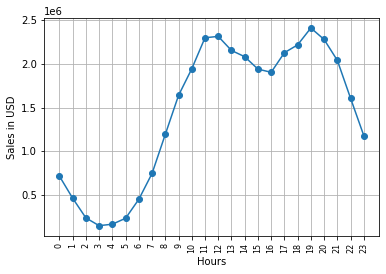

In [35]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours')['Sales'].sum().reset_index()
# hours = [hour for hour, sales in sales_value_hours.items()]
hours_array = sales_value_hours['Hours'].values
sales_array = sales_value_hours['Sales'].values
plt.plot(hours_array, sales_array, marker='o', linestyle='-')
plt.grid()
plt.xticks(hours_array, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

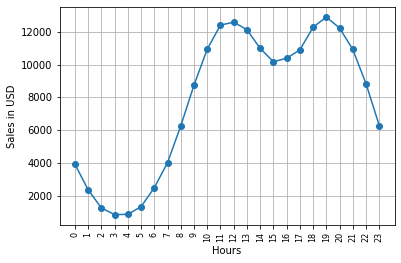

In [36]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours')['Sales'].count().reset_index()
# hours = [hour for hour, sales in sales_value_hours.items()]
hours_array = sales_value_hours['Hours'].values
sales_array = sales_value_hours['Sales'].values
plt.plot(hours_array, sales_array, marker='o', linestyle='-')
plt.grid()
plt.xticks(hours_array, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.4: Những sản phẩm thường được bán cùng nhau?

In [37]:
df_dup = df[df['Order ID'].duplicated(keep=False)].copy()
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

All Products
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64

Phân tích luật kết hợp khi được bán cùng nhau

In [38]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


dtframe = pd.DataFrame(df_dup['All Products'].values,  columns=['Product List'])

# Tách các sản phẩm trong mỗi danh sách
dtframe['Product List'] = dtframe['Product List'].str.split(', ')

# Sử dụng TransactionEncoder để chuyển đổi thành dữ liệu nhị phân
te = TransactionEncoder()
te_ary = te.fit(dtframe['Product List']).transform(dtframe['Product List'])
df_binary = pd.DataFrame(te_ary, columns=te.columns_)


# Áp dụng thuật toán Apriori để tìm tập phổ biến
frequent_itemsets = apriori(df_binary, min_support=0.001, use_colnames=True)

# Áp dụng thuật toán Association Rules để tìm các quy tắc kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("\nCác quy tắc kết hợp:")
print(rules.to_string())



Các quy tắc kết hợp:
                  antecedents                 consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
0              (Google Phone)      (USB-C Charging Cable)            0.229260            0.289098  0.139714    0.609413  2.107985  0.073436    1.820088       0.681959
1                    (iPhone)  (Lightning Charging Cable)            0.261351            0.248459  0.141676    0.542091  2.181818  0.076741    1.641247       0.733320
2  (Lightning Charging Cable)                    (iPhone)            0.248459            0.261351  0.141676    0.570220  2.181818  0.076741    1.718668       0.720741
3           (Vareebadd Phone)      (USB-C Charging Cable)            0.084221            0.289098  0.051570    0.612313  2.118015  0.027221    1.833701       0.576405


### Task 3.5: Sản phẩm nào bán chạy nhất? Tại sao bạn nghĩ rằng nó bán được nhiều nhất?

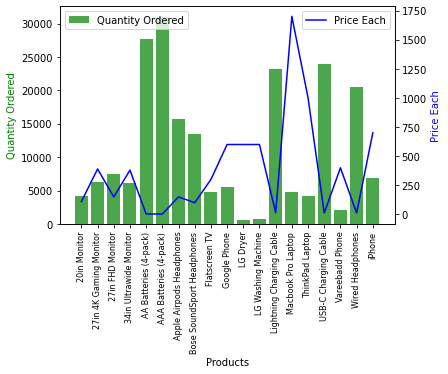

In [39]:
all_products = df.groupby('Product')['Quantity Ordered'].sum().reset_index()
prices = df.groupby('Product')['Price Each'].mean().reset_index()
products_ls = [product for product, quant in all_products.items()]

products_ls = all_products['Product'].tolist()
x = products_ls
y1 = all_products['Quantity Ordered'].values
y2 = prices['Price Each'].values

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xticks(range(len(products_ls)))
ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.bar(x, y1, color='g', alpha=0.7, label='Quantity Ordered')
ax2.plot(x, y2, 'b-', label='Price Each')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### 3.6: Sự tương quan về số lượng sản phầm và thời gian bán ra

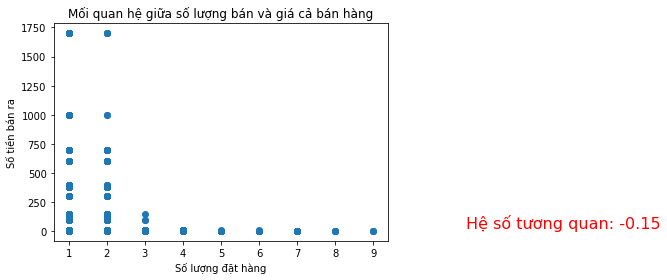

In [40]:
amount_quantity_ordered = df['Quantity Ordered'].values
prices_each_sales = df['Price Each'].values

plt.scatter(amount_quantity_ordered, prices_each_sales)
plt.xlabel('Số lượng đặt hàng')
plt.ylabel('Số tiền bán ra')
plt.title('Mối quan hệ giữa số lượng bán và giá cả bán hàng')

corr_coef = np.corrcoef(amount_quantity_ordered, prices_each_sales)[0, 1]

plt.text(14, 30, f'Hệ số tương quan: {corr_coef:.2f}', fontsize=16, color='red', ha='center')

plt.show()


### 3.7 Dùng hồi quy tuyến tính tính độ sai số của số lượng sản phẩm và thời gian bán ra

In [41]:
from sklearn.linear_model import LinearRegression

amount_quantity_ordered = np.array(df['Quantity Ordered'].values).reshape(-1, 1)
hours_sales = np.array(df['Hours'].values).reshape(-1, 1)

model = LinearRegression()

model.fit(hours_sales, amount_quantity_ordered)

predict_amount_on_sales_hours = model.predict(hours_sales);

print("Hệ số hồi qui (slop):", model.coef_[0])
print("Sai số (intercept):", model.intercept_)

# plt.scatter(hours_sales, amount_quantity_ordered, color="blue", label="Dữ liệu thực tế")
# plt.plot(hours_sales, amount_quantity_ordered, color="red", label="Đường hồi qui")
# plt.xlabel("Số giờ học bán")
# plt.ylabel("Số lượng bán ra")
# plt.title("Mối quan hệ giữa số lượng bán và số giờ bán")
# plt.legend()
# plt.show()


Hệ số hồi qui (slop): [-0.00018107]
Sai số (intercept): [1.12699266]


### 3.8: Phân tích doanh số bán hàng theo ngày, tuần, tháng

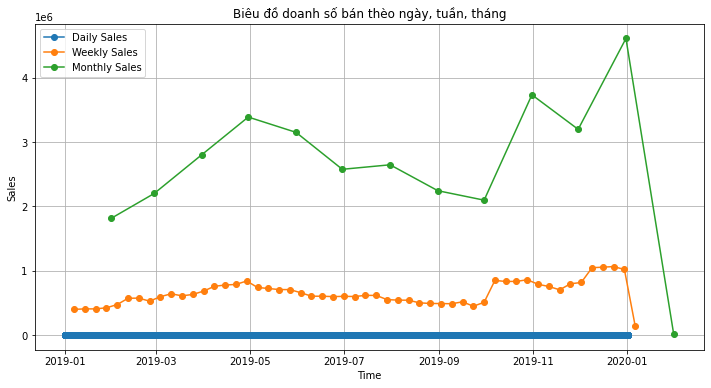

In [42]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Date'] = df['Order Date'].dt.date
df = df.sort_values('Order Date')

# Tính toán doanh số theo ngày
daily_sales = df.groupby('Order Date')['Sales'].sum()
# Tính toán doanh số theo tuần
weekly_sales = df.resample('W-Mon', on='Order Date')['Sales'].sum()
# Tính toán doanh số theo tháng
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales', marker='o')
plt.plot(weekly_sales, label='Weekly Sales', marker='o')
plt.plot(monthly_sales, label='Monthly Sales', marker='o')

plt.title('Biêu đồ doanh số bán thèo ngày, tuần, tháng')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

### 3.10 Training bằng dữ liệu để biết các mức giá bán trong tương lai

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib  # Import joblib for model persistence
import json

# Assuming df is your DataFrame
features = np.array(df[['Price Each']]).reshape((-1, 1))
target = np.array(df['Quantity Ordered'])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Save the trained model to a file
joblib.dump(model, 'trained_model.joblib')

# Sử dụng mô hình để dự đoán
new_data = pd.DataFrame({'Price Each': [200.0, 130.0, 70.0, 60.0]})
translate_data = np.array(new_data['Price Each'].values).reshape((-1, 1))

# Load the saved model from the file
loaded_model = joblib.load('trained_model.joblib')

predicted_values = loaded_model.predict(translate_data)

print("Dự đoán số lượng đặt hàng cho giá trị mới:")
for i, value in enumerate(predicted_values):
    print(f'Giá: {new_data["Price Each"].iloc[i]}, Dự đoán: {value}')


Mean Squared Error: 0.19963906705379486
Dự đoán số lượng đặt hàng cho giá trị mới:
Giá: 200.0, Dự đoán: 1.1209753740113229
Giá: 130.0, Dự đoán: 1.1346829227986746
Giá: 70.0, Dự đoán: 1.1464322503306903
Giá: 60.0, Dự đoán: 1.1483904715860263


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib  # Import joblib for model persistence
import json

# Assuming df is your DataFrame
features = np.array(df[['Price Each']]).reshape((-1, 1))
target = np.array(df['Quantity Ordered'])
address = np.array(df['Purchase Address'])
productName = np.array(df['Product'])

# Convert NumPy arrays to a new DataFrame
df_new = pd.DataFrame({'Price Each': features.flatten(), 'Quantity Ordered': target, 'Purchase Address': address, 'Product': productName})

# Save the new DataFrame to a CSV file
df_new.to_csv('../ProjectNopThay ( Cuoi Ki )/server/uploads/predict.csv', index=False)